In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
data = pd.read_csv('./data/Taitanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA(탐색적 데이터분석)
- 데이터 특성, 분포, 변환 

In [7]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [8]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data = data.drop('Cabin', axis=1)

In [13]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 범주형 데이터와 수치형 데이터 분리

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [35]:
# PassengerId는 왜?
categorical_1 = data[['Name', 'Sex', 'Ticket', 'Embarked']]
numerical_1 = data[['Pclass', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare']]

In [36]:
categorical_1.describe(include='all')

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Dooley, Mr. Patrick",male,347082,S
freq,1,577,7,646


In [37]:
for cat_cols in categorical_1:
#     print(cat_cols)
    print(data[cat_cols].value_counts())
    print()

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64

Sex
male      577
female    314
Name: count, dtype: int64

Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
392091             1
Name: count, Length: 681, dtype

In [38]:
numerical_1.describe()

,Pclass,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.836071,0.486592,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


### dtype을 출력하여 조건문으로 범주형과 수치형 자료를 분리

In [50]:
# 조건문 활용 범주형/수치형 자료의 컬럼명 저장
categorical_2_cols = []
numerical_2_cols = []

for col in data:
#     print(col, data[col].dtype)
    if data[col].dtype == 'object':
        categorical_2_cols.append(col)
    else:
        numerical_2_cols.append(col)
print(categorical_2_cols)
print(numerical_2_cols)

['Name', 'Sex', 'Ticket', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [51]:
data[categorical_2_cols].head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [53]:
data[numerical_2_cols].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [57]:
data[categorical_2_cols].describe()

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Dooley, Mr. Patrick",male,347082,S
freq,1,577,7,646


In [58]:
data[numerical_2_cols].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### select_dtypes()를 이용한 범주형/수치형 변수 구분
- 범주형 자료 : 데이터프레임명.select_dtypes(include=['object'])
- 범주형 자료 : 데이터프레임명.select_dtypes(exclude=['object'])

In [65]:
cate_col3 = data.select_dtypes(include=['object'])
num_col3 = data.select_dtypes(exclude=['object'])

In [68]:
cate_col3.describe()

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Dooley, Mr. Patrick",male,347082,S
freq,1,577,7,646


In [74]:
num_col3.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
for col in cate_col3:
    print(cate_col3[col].value_counts())
    print()

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64

Sex
male      577
female    314
Name: count, dtype: int64

Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
392091             1
Name: count, Length: 681, dtype

In [79]:
for col in num_col3:
    print(num_col3[col].value_counts())
    print()

PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
31     1
32     1
33     1
34     1
35     1
Name: count, Length: 891, dtype: int64

Survived
0    549
1    342
Name: count, dtype: int64

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64



In [80]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [83]:
# data['PassengerId'].unique()

In [84]:
# 이것은 인덱스 대용으로 사용될 수 있으므로 의미 없음
# data['PassengerId'].describe()

In [86]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: ylabel='count'>

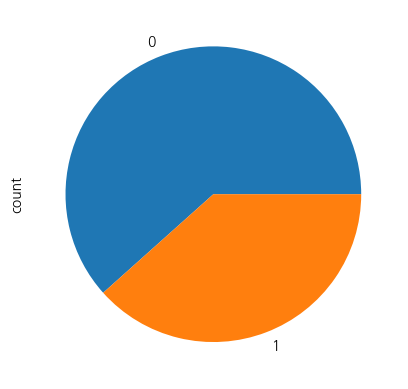

In [91]:
print(data['Survived'].value_counts())

# value_counts() 하지 않고 진행하면 보기 힘듦
# data['Survived'].value_counts().plot(kind='bar')
data['Survived'].value_counts().plot(kind='pie')

<Axes: xlabel='Pclass'>

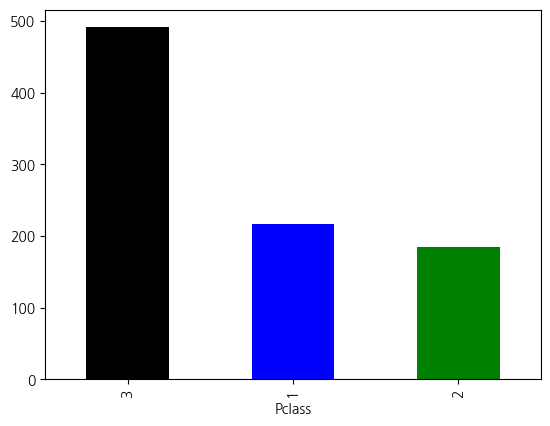

In [129]:
data['Pclass'].value_counts().plot(kind='bar', color=['black','blue','green'])

In [104]:
len(data['Name'].unique())

891

Sex
male      577
female    314
Name: count, dtype: int64


<Axes: ylabel='count'>

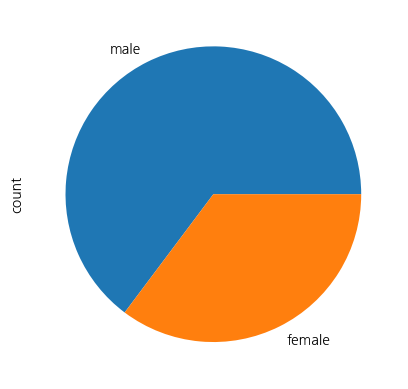

In [123]:
print(data['Sex'].value_counts())
data['Sex'].value_counts().plot(kind='pie')

In [115]:
data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

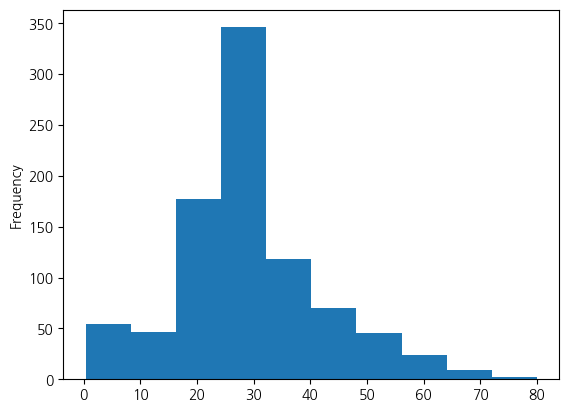

In [113]:
data['Age'].plot(kind='hist')

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: xlabel='SibSp'>

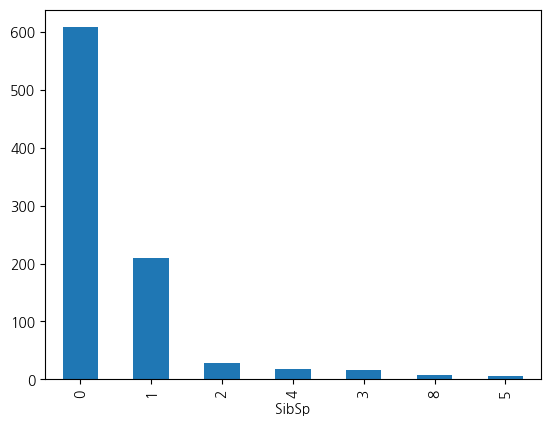

In [121]:
print(data['SibSp'].value_counts())
data['SibSp'].value_counts().plot(kind='bar')

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


<Axes: xlabel='Parch'>

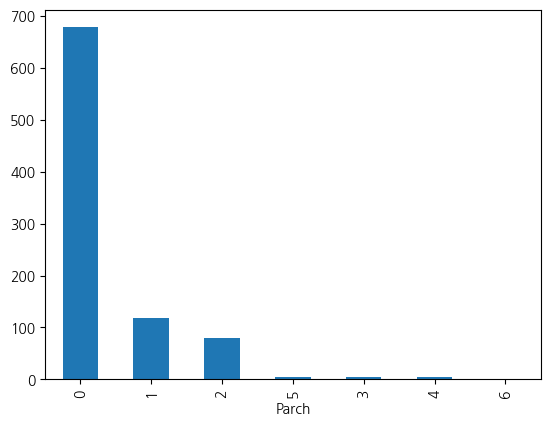

In [122]:
print(data['Parch'].value_counts())
data['Parch'].value_counts().plot(kind='bar')

In [124]:
# 겹치는 것 없이 거의 개별적으로 존재한다는 것을 확인
data['Ticket'].value_counts()

Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
392091             1
Name: count, Length: 681, dtype: int64

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64


<Axes: ylabel='Frequency'>

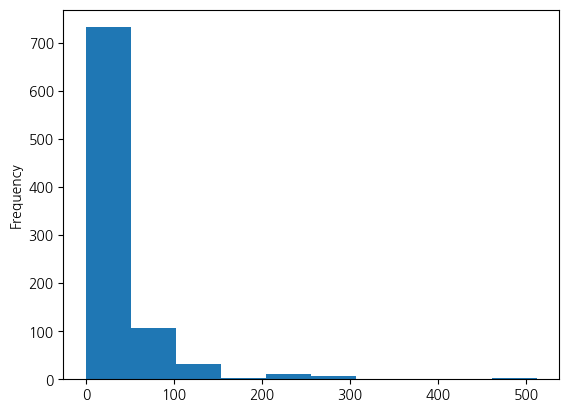

In [134]:
print(data['Fare'].value_counts())

# 극단적인 데이터 분포 확인
data['Fare'].plot(kind='hist')

<Axes: >

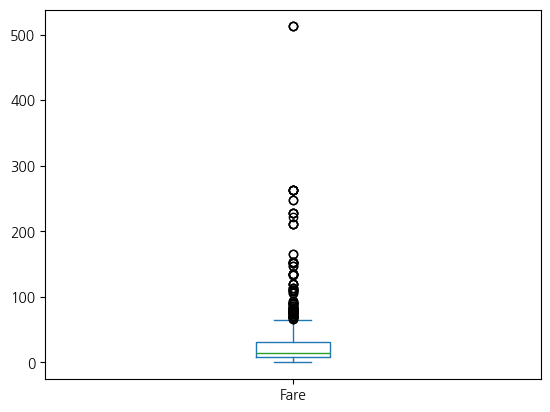

In [135]:
data['Fare'].plot(kind='box')

In [132]:
fare_desc = data['Fare'].describe()
maximum = fare_desc.loc['75%'] + (1.5 * (fare_desc.loc['75%'] - fare_desc.loc['25%']))

In [136]:
outliears = data[data['Fare'] > maximum]
outliears

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


### Fare를 pclass별로 나누어 확인

In [141]:
pc_fare_desc = data[['Pclass','Fare']].groupby('Pclass').describe()
pc_fare_desc

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [158]:
pc1_max = pc_fare_desc.loc[1, ('Fare', '75%')] + (1.5 * (pc_fare_desc.loc[1, ('Fare', '75%')] - pc_fare_desc.loc[1, ('Fare', '25%')]))
pc2_max = pc_fare_desc.loc[2, ('Fare', '75%')] + (1.5 * (pc_fare_desc.loc[2, ('Fare', '75%')] - pc_fare_desc.loc[2, ('Fare', '25%')]))
pc3_max = pc_fare_desc.loc[3, ('Fare', '75%')] + (1.5 * (pc_fare_desc.loc[3, ('Fare', '75%')] - pc_fare_desc.loc[3, ('Fare', '25%')]))

In [159]:
pc1_max = pc_fare_desc.loc[1, ('Fare', '75%')] + (1.5 * pc_fare_desc.loc[1, ('Fare', '75%')] - pc_fare_desc.loc[1, ('Fare', '25%')])
pc1_max

np.float64(202.82605)

In [157]:
data[(data['Pclass'] == 1) & (data['Fare'] > pc1_max)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,C
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,C
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S


In [161]:
# 평균 : 20.66218
# 중간값 : 14.2500
data[(data['Pclass'] == 2) & (data['Fare'] > pc2_max)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5,S
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5,S
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0,S


In [162]:
# 평균 : 13.675550
# 중간값 : 8.0500
data[(data['Pclass'] == 3) & (data['Fare'] > pc3_max)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.2750,S
16,17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,Q
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.000000,1,5,347077,31.3875,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.000000,4,1,3101295,39.6875,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,CA 2144,46.9000,S
63,64,0,3,"Skoog, Master. Harald",male,4.000000,3,2,347088,27.9000,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,CA 2144,46.9000,S
74,75,1,3,"Bing, Mr. Lee",male,32.000000,0,0,1601,56.4958,S
86,87,0,3,"Ford, Mr. William Neal",male,16.000000,1,3,W./C. 6608,34.3750,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.000000,4,2,347082,31.2750,S


<Axes: ylabel='count'>

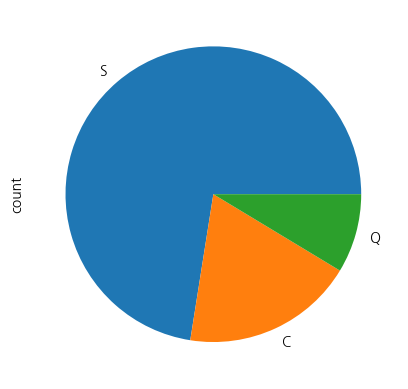

In [221]:
# data['Embarked'].value_counts().plot(kind='bar')
data['Embarked'].value_counts().plot(kind='pie')

# 타겟(종속) 변수(Survived)와 독립변수(Survived 제외 나머지 컬럼) 관계 파악
- groupby(독립변수) : 독립변수에 따른 독립변수의 변화 파악

In [170]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Pclass는 생존율에 영향을 미침
- Pclass가 낮아짐에 따라 생존률이 낮아진다는 사실 확인

In [169]:
# Pclass별 생존률 확인
data[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [175]:
# 의미가 없는 것을 알 수 있음
data[['Name', 'Survived']].groupby('Name').mean()

,Survived
Name,
"Abbing, Mr. Anthony",0.0
"Abbott, Mr. Rossmore Edward",0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1.0
"Abelson, Mr. Samuel",0.0
"Abelson, Mrs. Samuel (Hannah Wizosky)",1.0
...,...
"de Mulder, Mr. Theodore",1.0
"de Pelsmaeker, Mr. Alfons",0.0
"del Carlo, Mr. Sebastiano",0.0


### 성별은 생존율에 영향을 미침
- 여성의 생존율이 남성보다 월등히 높다는 사실 확인

In [177]:
data[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


### 나이는 생존율에 영향을 미침(구간별로 확인)
- 나이를 구간화하여 생존율과의 관계 파악
    - 10대, 20대, 30대, 40대, 50대 
    - 0 - 10 : under10s
    - 10 - 19 : 10s
    - 10 - 19 : 10s
    - 20 - 29 : 20s
     - ....

In [180]:
def age_cat(x):
    if x< 10:
        return 'under10s'
    elif 10 <= x < 20:
        return '10s'
    elif 10 <= x < 20:
        return '10s'
    elif 20 <= x < 30:
        return '20s'
    elif 30 <= x < 40:
        return '30s'
    elif 40 <= x < 50:
        return '40s'
    elif 50 <= x < 60:
        return '50s'
    elif 60 <= x < 70:
        return '60s'
    elif 70 <= x < 80:
        return '70s'
    elif 80 <= x < 90:
        return '80s'

In [181]:
# 나이별 생존율 파악하기 쉽지 않음 -> 나이를 구간으로 변경하여 찾아보기
data['Age'].max()

np.float64(80.0)

In [187]:
data['Age_cat'] = data['Age'].apply(age_cat)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,30s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,30s
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,30s


### 연령대별 생존율 확인

In [222]:
data[['Age_cat', 'Survived']].groupby('Age_cat').mean().sort_values(by='Survived', ascending=False)

,Survived
Age_cat,
80s,1.000000
under10s,0.612903
30s,0.437126
50s,0.416667
10s,0.401961
40s,0.382022
20s,0.324937
60s,0.315789
70s,0.000000


### 형제자매/배우자의수별 생존율 확인

In [223]:
data[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### 부모/자식수별 생존율 확인

In [224]:
data[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


### 티켓 가격별 생존율 확인

In [225]:
data[['Ticket', 'Survived']].groupby('Ticket').mean()

,Survived
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110564,1.000000
110813,1.000000
...,...
W./C. 6608,0.000000
W./C. 6609,0.000000
W.E.P. 5734,0.000000


### 요금별 생존율 확인

In [226]:
data[['Fare', 'Survived']].groupby('Fare').mean().sort_values(by='Fare', ascending=False)

,Survived
Fare,
512.3292,1.000000
263.0000,0.500000
262.3750,1.000000
247.5208,0.500000
227.5250,0.750000
...,...
6.4375,0.000000
6.2375,0.000000
5.0000,0.000000


### 탑승 항구별 생존율 확인

In [199]:
data[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Embarked', ascending=False)

,Survived
Embarked,
S,0.339009
Q,0.389610
C,0.553571


## Pclass, Sex, Age_cat : 생존율에 영향

In [202]:
data[['Pclass', 'Sex', 'Survived']].groupby(['Pclass','Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [203]:
data[['Pclass', 'Sex', 'Age_cat', 'Survived']].groupby(['Pclass','Sex', 'Age_cat']).mean()

Survived
Pclass Sex    Age_cat           
1      female 10s       1.000000
              20s       0.960000
              30s       1.000000
              40s       1.000000
              50s       0.916667
              60s       1.000000
              under10s  0.000000
       male   10s       0.400000
              20s       0.358974
              30s       0.521739
              40s       0.375000
              50s       0.266667
              60s       0.100000
              70s       0.000000
              80s       1.000000
              under10s  1.000000
2      female 10s       1.000000
              20s       0.888889
              30s       0.941176
              40s       0.900000
              50s       0.833333
              under10s  1.000000
       male   10s       0.100000
              20s       0.054054
              30s       0.096774
              40s       0.125000
              50s       0.000000
              60s       0.333333
              70s       0.000000
              under10s  1.000000
3      female 10s       0.541667
              20s       0.547945
              30s       0.437500
              40s       0.000000
              60s       1.000000
              under10s  0.523810
       male   10s       0.095238
              20s       0.127551
              30s       0.150943
              40s       0.080000
              50s       0.000000
              60s       0.000000
              70s       0.000000
              under10s  0.380952

### cut() : 데이터의 구간화를 쉽게 해주는 함수 
- cut(data['Age', bins=[구간], labels['구간의 이름']])

In [206]:
data['Age_cat2'] = pd.cut(data['Age'], bins=[0,10,20,30,40,50,60,70,80,90], labels=['under10s','10s','20s','30s','40s','50s','60s','70s','80s'])

In [207]:
data[['Age_cat', 'Age_cat2']]

,Age_cat,Age_cat2
0,20s,20s
1,30s,30s
2,20s,20s
3,30s,30s
4,30s,30s
...,...,...
886,20s,20s
887,10s,10s
888,20s,20s
889,20s,20s


In [227]:
# data[['Pclass', 'Sex', 'Age_cat2', 'Survived']].groupby(['Pclass','Sex', 'Age_cat2']).mean()

# 변수들 간의 상관 관계 확인
- .corr()

----

- -1 : 음의 상관관계(반비례 관계, 집과 역의 거리가 멀면 집값이 떨어진다)
- 0 :  관계 없음
- 1 : 양의 상관관계(정비례 관계, 날씨가 더워지면 아이스크림 판매량이 높아짐)

In [217]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_cat', 'Age_cat2'],
      dtype='object')

In [220]:
data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000
